# Suicide Rates Overview (1985 - 2016)


## by (Viraj Patel)


## Preliminary Wrangling

> This is a dataset from kaggle. You can find the dataset on [this](https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016) link. This dataset contains number suicides grouped by Gender,Country and Year respecively. We can find out a lot information such as what age group or gender have more number of suicide victims. We'll discuss these questiong later first let's take an overview of the dataset.

> This dataset is a combination of multiple dataset from various sources.Such as Human development index (HDI) was retrieved from http://hdr.undp.org/en/indicators/137506 World Bank. And GDP (current US $) by country:1985 to 2016. Retrieved from http://databank.worldbank.org/data/source/world-development-indicators.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
sns.set(font_scale=1.5)
# Color Pallets
flatui = ['#1abc9c','#3498db','#9b59b6','#34495e','#e67e22','#e74c3c','#95a5a6','#353b48','#9c88ff','#f78fb3']

In [2]:
df = pd.read_csv("./master.csv")

### Let's take an overview of the dataset.

In [3]:
print (df.shape,"\n")
print (df.dtypes,"\n")
df.head()

(27820, 12) 

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object 



,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


### Structure of the dataset.

This dataset contains 27820 rows with number suicides grouped by variables like Sex, Age and Country. We have categorical columns such as Country,Year,Age and Generation and Numerical columns such as HDI for year, GDP and GDP per capita.

### Interesting Features

+ Age, Country and Year are some of the interesting features in the dataset. We'll try to find out relationship between these variables and suicide rates. We try to figure out following quetions ...


1. Which countries have higher number of suicide victims over the years ?
2. Is gender a effective factor in suicide rate ?
3. Which age group have more number of suicide cases ?
4. Does population effects number of suicides ?
5. Has anything changed over the time ?

Before further exploration we need to fix some features in data.

In [4]:
#Converting Columns to easily Readable Form
df.columns = list(map(lambda x:x.lower().replace("_"," ").title().replace(" ","") ,df.columns))

# Handling Datatypes
df['GdpForYear($)'] = df['GdpForYear($)'].apply(lambda x:int(x.replace(",","")))
df['GdpPerCapita($)'] = df['GdpPerCapita($)'].astype(int)

# Removing Years from Age Group
df['Age'] = df['Age'].apply(lambda x:x.strip(" years"))

df.head()

,Country,Year,Sex,Age,SuicidesNo,Population,Suicides/100KPop,Country-Year,HdiForYear,GdpForYear($),GdpPerCapita($),Generation
0,Albania,1987,male,15-24,21,312900,6.71,Albania1987,NaN,2156624900,796,Generation X
1,Albania,1987,male,35-54,16,308000,5.19,Albania1987,NaN,2156624900,796,Silent
2,Albania,1987,female,15-24,14,289700,4.83,Albania1987,NaN,2156624900,796,Generation X
3,Albania,1987,male,75+,1,21800,4.59,Albania1987,NaN,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34,9,274300,3.28,Albania1987,NaN,2156624900,796,Boomers


Now that we have proper data to work with we can move further.

**Note**: I'm not going to explore all of the features,I'll use features that are interesting only.

## Univariate Exploration

> In this section, we'll investigate distributions of individual variables. If you see unusual points or outliers, take a deeper look to clean things up.

**Note**: This dataset contains suicide data in groups, so for univariate exploration i'll group and sum the suicide rates for each variable.

#### Let's find out suicide counts for different countries.

Text(0.5, 1.0, 'Bottom 10 Countries in Suicide Count')

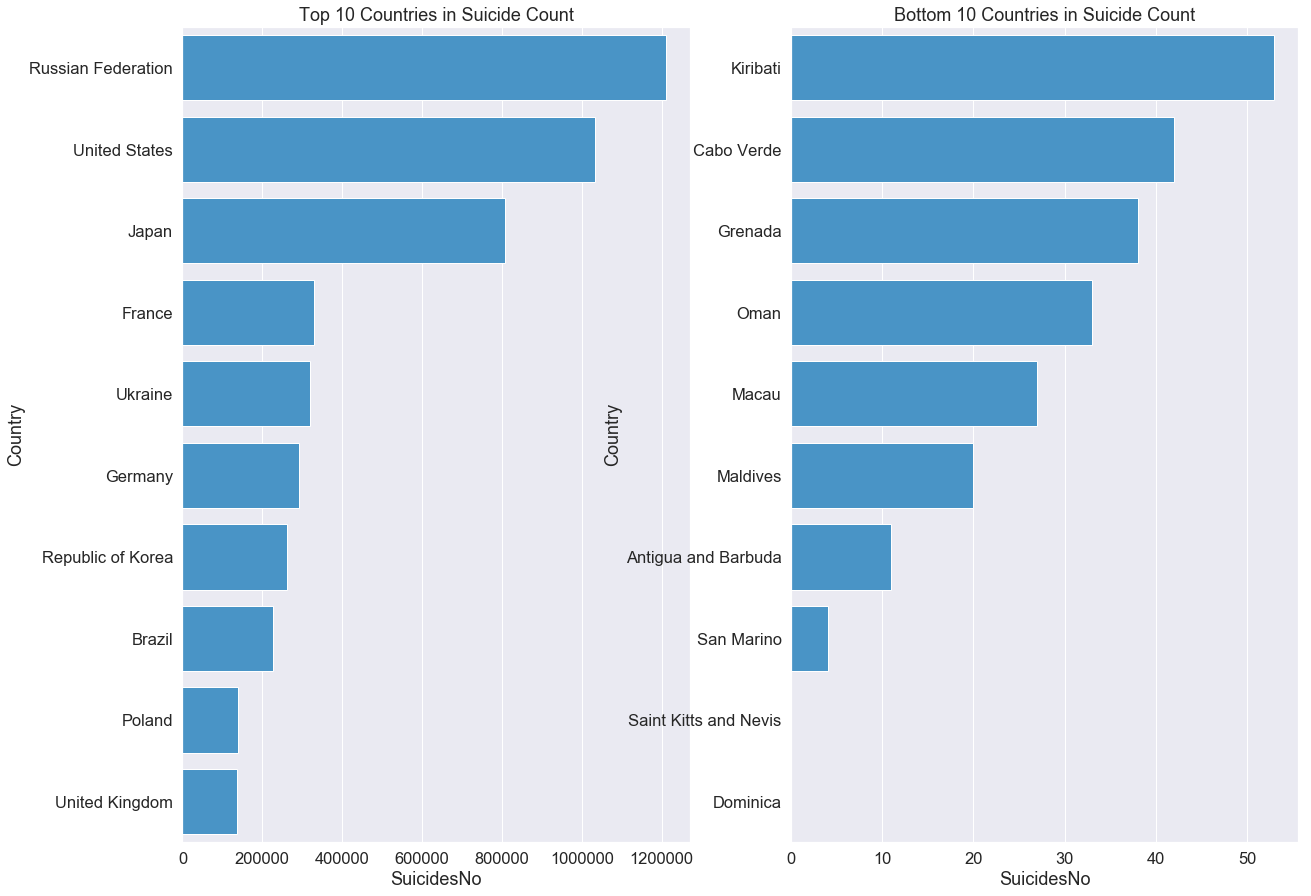

In [5]:
fig,axs = plt.subplots(1,2,figsize=(20,15))
tdf = df[['Country','SuicidesNo']].groupby('Country').sum().sort_values("SuicidesNo",ascending=False)

top10 = tdf.head(10)
bottom10 = tdf.tail(10)

sns.barplot(top10.SuicidesNo,top10.index,color=flatui[1],ax=axs[0]).set_title("Top 10 Countries in Suicide Count")
sns.barplot(bottom10.SuicidesNo,bottom10.index,color=flatui[1],ax=axs[1]).set_title("Bottom 10 Countries in Suicide Count")

> As per graph we can say that `Russian Federation`,`United States` and `Japan` have highest suicide counts in all of the countries. There are many factors that can lead to high suicide rate for country , population being one of them. So, if a country has higher population chances are it might have a high suicide rate.

> And countries like `kribati`,`Cabo Verde`,`Maldives`, and `Dominica` Very low suicide rate, Population factor seems to working here as these countries have very low population.

#### Let's check Suicide rate over the years.

Text(0.5, 1.0, 'Suicides Over The Years')

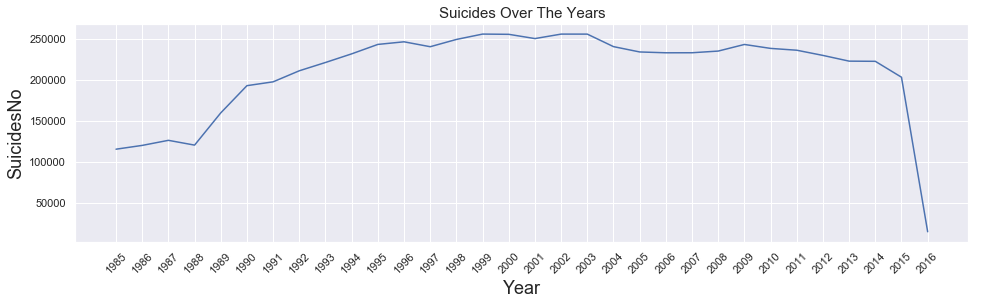

In [6]:
plt.figure(figsize=(16,4))
tdf = df[['Year','SuicidesNo']].groupby('Year').sum()
sns.lineplot(tdf.index,tdf.SuicidesNo,color="b")
plt.xticks(tdf.index,rotation=45,size=11)
plt.yticks(size=11)
plt.title("Suicides Over The Years",fontdict={"size":15})

> Suicide rate betweet years `1985` and `1988` is lowest for all time. We might think of `2016`, but we have very less data from 2016 so we surely cannot say that 2016 has lowest suicide rate. Also something interesting to look at is sudden drop between years `2003` and `2009`.


In [7]:
tdf.sort_values('SuicidesNo').tail(1)

,SuicidesNo
Year,
1999,256119


> Suicide rate is on peek in year `1999`, but after that it started decreasing slowly. Line is same between years `2004` to `2014`. And in 2015 it went down suddenly. For 2016 we can not be sure as we don't have mush data from 2016.

#### Another interesting variable to checkout is gender.

Text(0.5, 1.0, 'Sex Ratio')

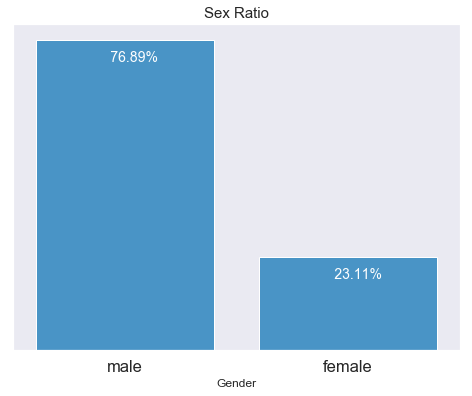

In [8]:
plt.figure(figsize=(8,6))
tdf = df[['Sex','SuicidesNo']].groupby('Sex').sum().sort_values("SuicidesNo",ascending=False)
sns.barplot(tdf.index,tdf.SuicidesNo,color=flatui[1]).axes.get_yaxis().set_visible(False)
locs,labels = plt.xticks()
plt.xlabel("Gender",fontdict={"size":12})

for label,loc,height in zip(labels,locs,tdf.SuicidesNo):
    plt.text(loc,height-3e5,"{:10.2f}%".format(height/sum(tdf.SuicidesNo) * 100),color="w",fontdict={"size":14,},ha="center",va="center")
    
plt.title("Sex Ratio",fontdict={"size":15})

> It seems Men are leading the charge even in suicides. Almost 80% victims in this dataset are men. For a men to commit suicide there are a lot of factors can if working. Such as Educational pressure, Financial pressure and Being emotinally broken. Developed countries can have almost same amount of pressure on both Men and Women as they have work load devided equally, But in developing countries and third world nations sometimes work pressure is high on Men compared to women this can be a major reason for this statastic.

Text(0.5, 1.0, 'Suicides In Age Gruops')

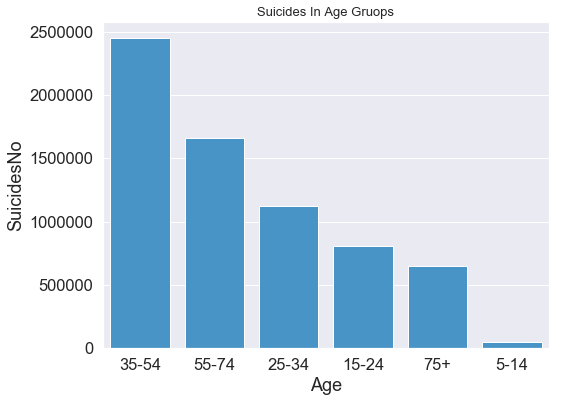

In [9]:
plt.figure(figsize=(8,6))
tdf = df[['Age','SuicidesNo']].groupby('Age').sum().sort_values("SuicidesNo",ascending=False)
sns.barplot(tdf.index,tdf.SuicidesNo,color=flatui[1])
plt.title("Suicides In Age Gruops",fontdict={"size":13})

> This seems bit awkward for me, I thought 15-24 years age group may have highest suicide count. But it seems being in 30's is not easy at all. Suicide rate is highest in `35-54` age group, Does that means finacial stabilty is related with suicidal tendency ?, We'll find that out later in the section... 

Text(0.5, 0, 'Generation')

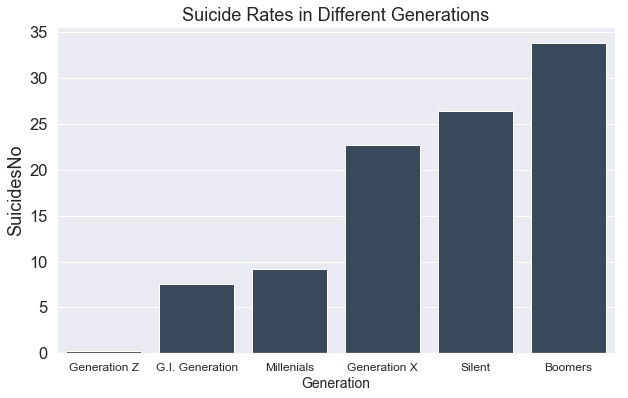

In [10]:
plt.figure(figsize=(10,6))
tdf = df[['Generation','SuicidesNo']].groupby("Generation").sum().sort_values('SuicidesNo')
sns.barplot(tdf.index,tdf.SuicidesNo/sum(tdf.SuicidesNo) * 100,color=flatui[3])
plt.title("Suicide Rates in Different Generations")
plt.xticks(size=12)
plt.xlabel('Generation',size=14)

> Graph for age groups and Generations looks identical. I did some reasearch and found out Generations indicates different age groups. You can find it in [this](https://communityrising.kasasa.com/gen-x-gen-y-gen-z/) article.

> Since they both are same, Creating different visualizations for them will be waste of time.  

Text(0.5, 1.0, 'Suicides Per 100K Population')

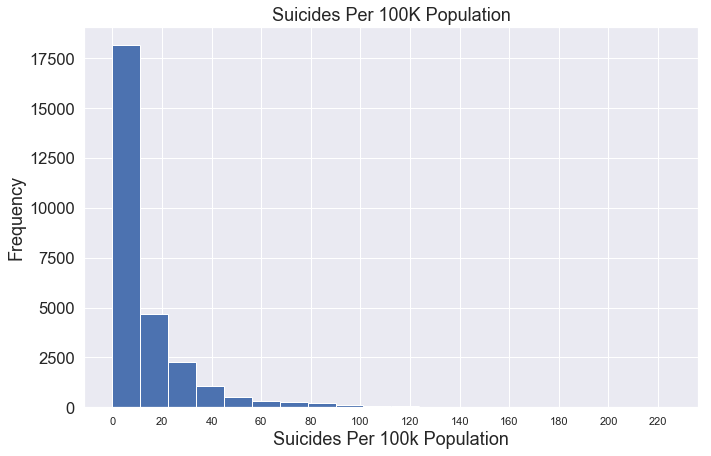

In [11]:
plt.figure(figsize=(11,7))
df['Suicides/100KPop'].plot.hist(bins=20)
plt.xticks(np.arange(0,240,20),size=11)
plt.xlabel("Suicides Per 100k Population")
plt.ylabel("Frequency")
plt.title("Suicides Per 100K Population")

> It is a Right Skewed distribution, There are vary few cases where suicide rate is higher than 80. We can consider some of them as outliers as well.

Now we know countries with higher suicide rate, Years which had most number of suicides, Gender with most number of suicide victims and Age group with highest suicide rate. Let's explore further in Bi variate Exploration to see if these variables are related somehow or not.

## Bivariate Exploration

> In this section,We'll investigate relationships between pairs of variables in our data.

Text(0.5, 1.0, 'Suicide Rate In Genders Over The Years')

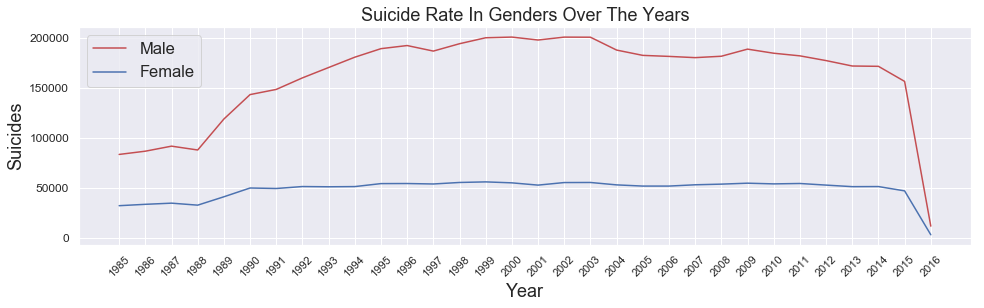

In [12]:
plt.figure(figsize=(16,4))
tdf = df[['Year','Sex','SuicidesNo']].groupby(['Sex','Year']).sum()
sns.lineplot(tdf.loc['male']['SuicidesNo'].index,tdf.loc['male']['SuicidesNo'].values,color='r',label='Male')
sns.lineplot(tdf.loc['female']['SuicidesNo'].index,tdf.loc['female']['SuicidesNo'].values,label='Female')
plt.legend()
plt.xticks(tdf.loc['female']['SuicidesNo'].index,size=11,rotation=45)
plt.yticks(size=12)
plt.ylabel("Suicides")
plt.title("Suicide Rate In Genders Over The Years")

> We already knew this was comming, We knew that Suicide count in male is higher then female but purpose of the chart was to find patterns in both genders over the years. 

> Line for men have more changes compared to women. Like Women's line is almost constant bewteen years `1990` and `2015`, But men's life way to more changes between this time. For example.there's a drop between 2002 and 2009.

Text(0.5, 1.0, 'Suicide Rate In Top 5 Countries Over The Years')

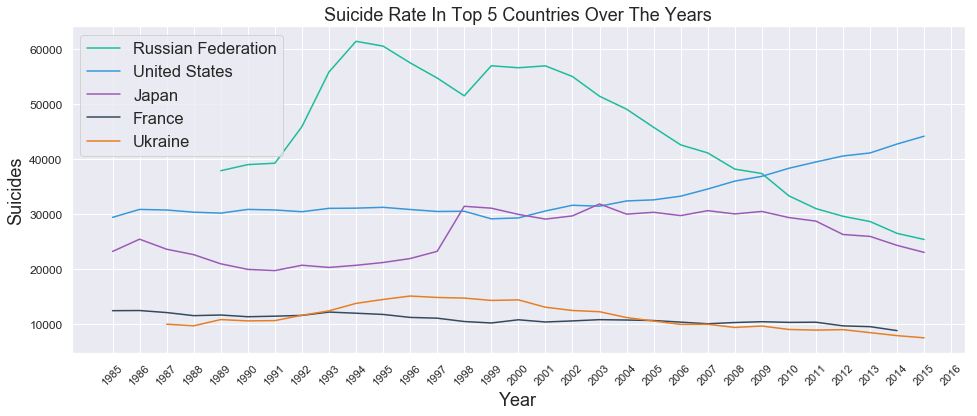

In [13]:
plt.figure(figsize=(16,6))
tdf = df[['Year','Country','SuicidesNo']].groupby(['Country','Year']).sum()

for country,color in zip(top10.index[:5],flatui[:5]):
    sns.lineplot(tdf.loc[country]['SuicidesNo'].index,tdf.loc[country]['SuicidesNo'].values,color=color,label=country)

plt.legend()
plt.xticks(df.Year.unique(),size=11,rotation=45)
plt.yticks(size=12)
plt.ylabel("Suicides")
plt.title("Suicide Rate In Top 5 Countries Over The Years")

> This is something to look into, First of all let's look at the Line of Russian Federation. It has a major increase between 1991 and 1994, But it's decreasing continuosly after 1992.

> Line for United States is one to look for, It seems Suicide rates in US is continuosly. Unlike other countries where line is increasing and decreasing after some point , Line for United Stated is increasing countinuosly. You can read [this](https://en.wikipedia.org/wiki/Suicide_in_the_United_States) article for more information.

> As per Japan's line, It is low in starting but it increased in stayed at same rate for a long time. And decrease in the end is not very good at all. Now for further analysis we'll consider these 3 countries as variables to visualize.

Text(0.5, 1.0, 'Suicide Rate In Different Age Groups Over The Years')

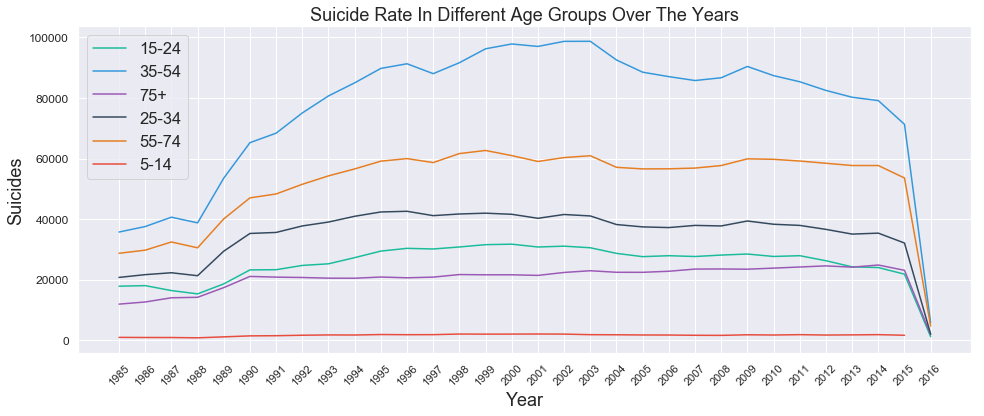

In [14]:
plt.figure(figsize=(16,6))
tdf = df[['Year','Age','SuicidesNo']].groupby(['Age','Year']).sum()

for age,color in zip(df.Age.unique(),flatui[:df.Age.nunique()]):
    sns.lineplot(tdf.loc[age]['SuicidesNo'].index,tdf.loc[age]['SuicidesNo'].values,color=color,label=f"{age}")

plt.legend()
plt.xticks(df.Year.unique(),size=11,rotation=45)
plt.yticks(size=12)
plt.ylabel("Suicides")
plt.title("Suicide Rate In Different Age Groups Over The Years")

> Only one line to look is for age group for `35-54`, Except that every line is almost identical. In our main time series graph the line looked same as  `35-54's` line. That means suicide rate over the years is effected by suicide rate of `35-54` age group. 

> Line for age group `5-14` is also interesting. It is neither increasing neither decreasing over the time. Something must've happend during the time span of `2003 to 2009`, because in every age group there's drop and then increase in that time span. But that's a different topic. We'll talk over it in some different project.

### Now let's check weather GDP have any effect on suicide rate or not.

[Text(0.5, 1.0, 'Relation Between GDP Per Capita And Suicide Count')]

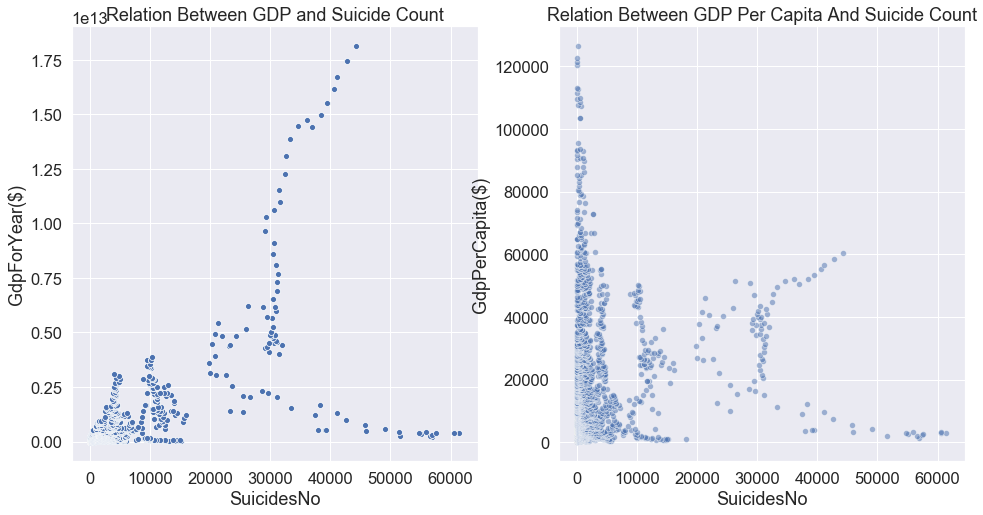

In [15]:
fig,axs = plt.subplots(1,2,figsize=(16,8))

tdf = df[['GdpForYear($)','SuicidesNo']].groupby('GdpForYear($)').sum()
sns.scatterplot(tdf['SuicidesNo'],tdf.index,ax=axs[0]).set(title="Relation Between GDP and Suicide Count")

tdf = df[['GdpPerCapita($)','SuicidesNo']].groupby('GdpPerCapita($)').sum()
sns.scatterplot(tdf['SuicidesNo'],tdf.index,alpha=0.5,ax=axs[1]).set(title="Relation Between GDP Per Capita And Suicide Count")

> Looks like GPD for year and that year's suicide count has a moderate realation, becuase it seems like a positive co-relation for large number of values but it also has a lot of outliers. Yet we can say that GDP For year has some moderate relation with suicide count. We'll eplore this in further analysis.

> For GDP per capita, It doesn't look like very strong relationship. Per se it looks between weak and moderate. I don't think we should consider this as effectable factor in suicide rate.

#### Let's check Population and suicide rate for some relations.

[Text(0.5, 1.0, 'Suicides Per 100K pop. VS Suicide Numbers')]

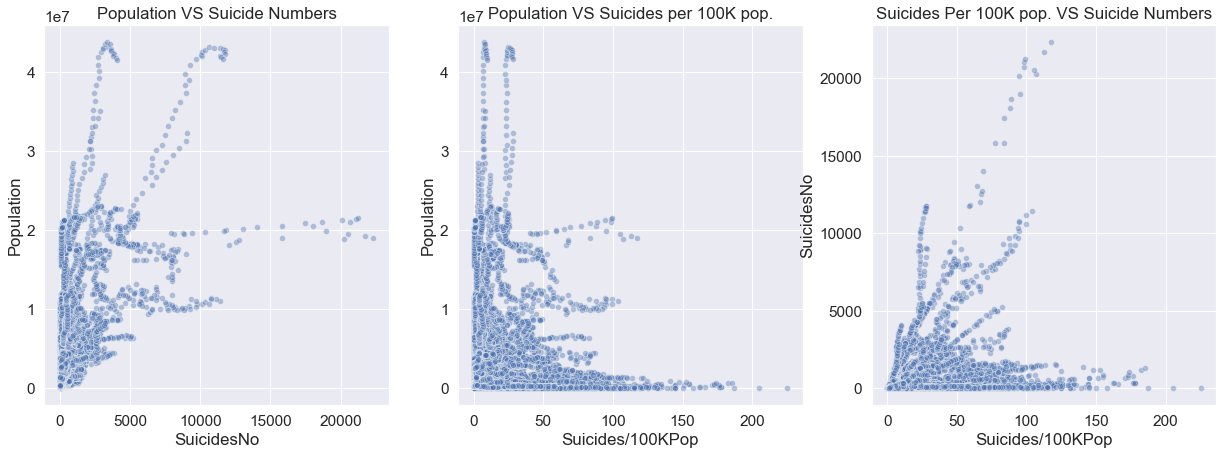

In [68]:
fig,axs = plt.subplots(1,3,figsize=(21,7))

sns.scatterplot(df['SuicidesNo'],df['Population'],ax=axs[0],alpha=0.4).set(title="Population VS Suicide Numbers")
sns.scatterplot(df['Suicides/100KPop'],df['Population'],ax=axs[1],alpha=0.4).set(title="Population VS Suicides per 100K pop.")
sns.scatterplot(df['Suicides/100KPop'],df['SuicidesNo'],ax=axs[2],alpha=0.4).set(title="Suicides Per 100K pop. VS Suicide Numbers")



> First plot shows relation between Population and Suicide Numbers, this graph shows moderately strong relationship with so many oitliers. These outliers might be because of age and gender factors. We'll find this out later, But for this one we can say that Population ans Suicides Numbers have a positive correlation.

> Second plot shows relation between Population and Suicides per 100K population. This graph is not as expected because this shows increase in population has no effeect on suicide rate per 100K pop. at all. We can say that this is a very weak relationship indeed.

> Third plot shows relation between Suicides numbers and Suicide rate per 100K pop. Now this graph is what something we expected. Because this shows a moderately strong relationship. We can say that as Suicide rate per 100K pop. increases number of suicides also increases.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

First of all let's check Suicide rate comparison in top 3 countries for gender.

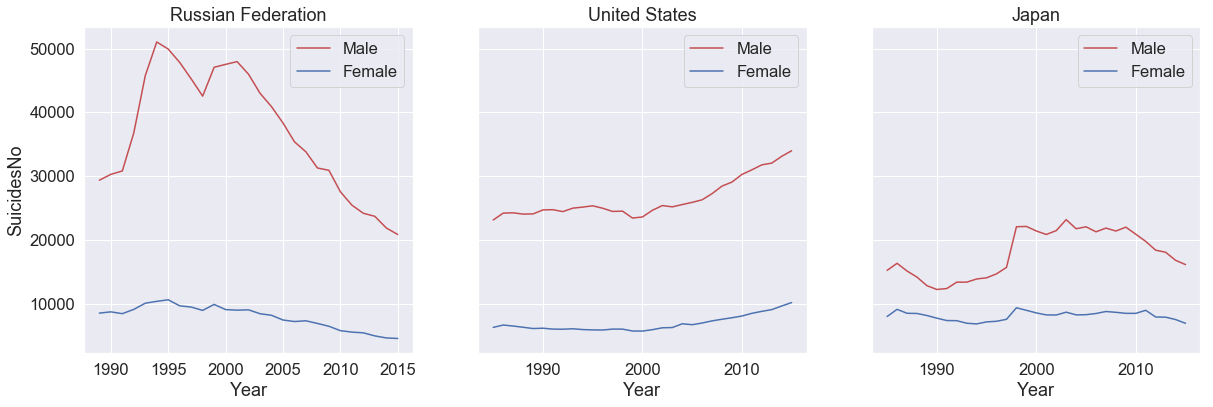

In [17]:
fig,axs = plt.subplots(1,3,figsize=(20,6),sharey=True)
tdf = df[['Country','Sex','Year','SuicidesNo']].groupby(['Country','Sex','Year']).sum()

for country,ax in zip(top10.index[:3],range(3)):
    t = tdf.loc[country]
    male = t.loc['male']
    female = t.loc['female']
    
    sns.lineplot(male.index,male.SuicidesNo,label="Male",color="r",ax=axs[ax])
    sns.lineplot(female.index,female.SuicidesNo,label="Female",color="b",ax=axs[ax]).set_title(country)

    

> This looks nothing different from the original time series graph. But something to notice here is curves of the lines in main graph are dependent on male line as female line doesn't show any noticeable curves. Also both lines in united states graph seems very identicle. We can agree on both genders are having hard times in united states.

Let's check suicide rates for different age groups in both genders.

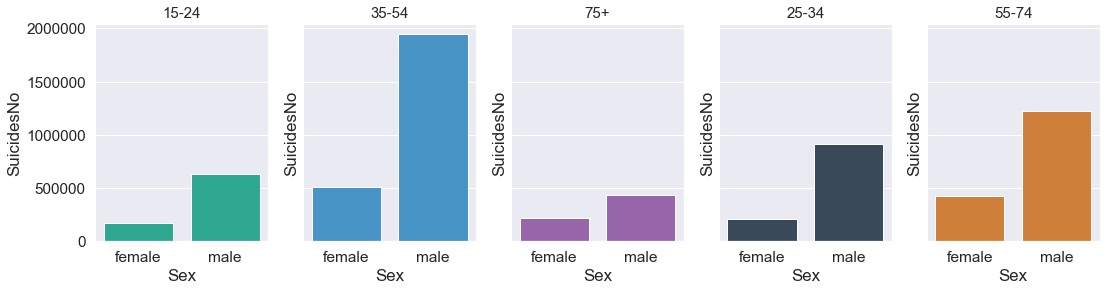

In [33]:
tdf = df[['Age','Sex','SuicidesNo']].groupby(['Age','Sex']).sum()
fig,axs = plt.subplots(1,5,figsize=(18,4),sharey=True)

for age,ax in zip(df.Age.unique(),range(5)):
    t = tdf.loc[age]
    sns.barplot(t.index,t.SuicidesNo,ax=axs[ax],color=flatui[ax]).set_title(age,size=15)
    

> Age group of 35-54 have massive gap in gender ratio. This again proves that being and male adult is a tough task. Males in this age group have a lot of problems to handle. In this age you have kids to raise , collecting their college fees, having a financial stability and many more.

> All of the other age groups don't have very larg difference compared to `35-54`. Also age group of `75+` have a very small gap. We can say that if survive being a male adult probably there will be very less chances of commiting suicide after retirement.

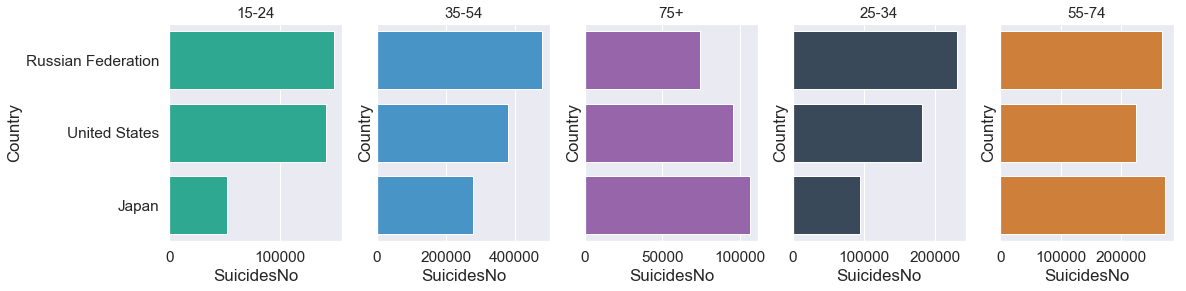

In [35]:
tdf = df[['Age','Country','SuicidesNo']].groupby(['Age','Country']).sum()
fig,axs = plt.subplots(1,5,figsize=(18,4),sharey=True)

for age,ax in zip(df.Age.unique(),range(5)):
    t = tdf.loc[age].loc[top10.index[:3]]
    sns.barplot(t.SuicidesNo,t.index,ax=axs[ax],color=flatui[ax]).set_title(age,size=15)
    

> `75+` age group is one to look at in these graphs. Because every graph follows same trend. But graph for `75+` age group is different. Where every graph has Russian Federation as highest and Japan as lowest, this graph has Japan as highest and Russian Federation with lowest bar height.

> This shows in Japan more suicide victims belong to age group of `75+`. Also one thing to notice is US has same height in every graph, that means age factor doesn't matter in US. There are almost same of suicide victims from every age group.

[Text(0.5, 1.0, 'Effect of Population in Gender Ratio')]

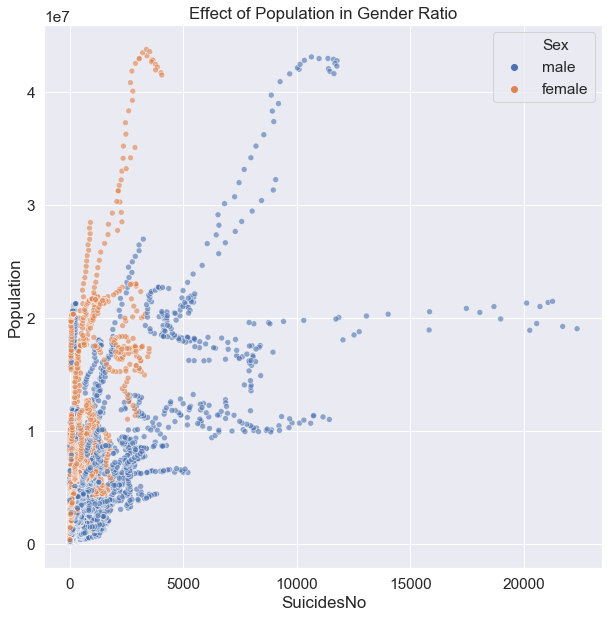

In [60]:
plt.figure(figsize=(10,10))
sns.scatterplot(df.SuicidesNo,df.Population,hue=df.Sex,alpha=0.6).set(title="Effect of Population in Gender Ratio")

> This scatter gives accurate representation on our outliers from before. We know that male suicide victim count is way to large, And this graph shows that points where suicides rate is higher but population is low are all male. Also this graph indicates that population increase has no effect on female suicide rate at all.

[Text(0.5, 1.0, 'Effect of Population in Age Groups')]

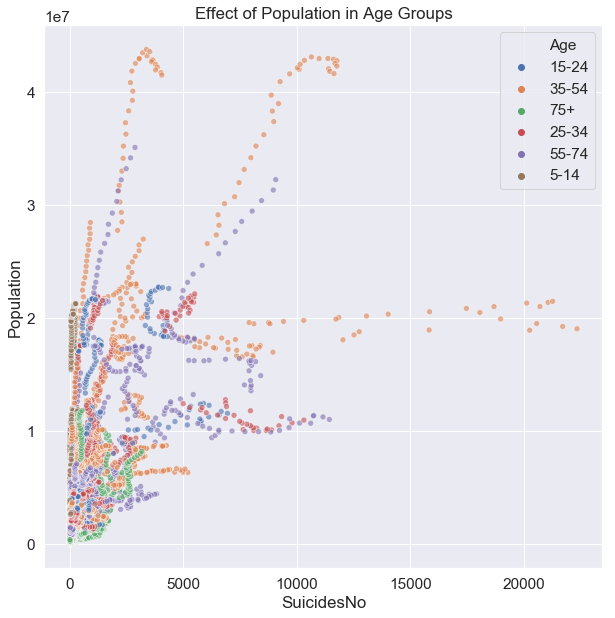

In [61]:
plt.figure(figsize=(10,10))
sns.scatterplot(df.SuicidesNo,df.Population,hue=df.Age,alpha=0.6).set(title="Effect of Population in Age Groups")

> This one looks quite messy, But one thing to notice is age group of `35-54` in sacttered everywhere. So population doesn't at all for this age group. We can consider other factors like sex to interprete those scatters.

> Also something interesting to look is age group of `5-14`, As this group has no effect of population whatover.
 
> Age groups except these two has almost same spread pattern.

This is the end of the visualization part. Now let's point out what we found.

### Facts and Points

We found out most of our answers during the Exploration. Facts such as

+ Russian Federation, United States and Japan are the countries with most number of suicides over the years. We also found rate of suicide over the years for these countries where came to know that Suicide rate in United States is increasing continuosly.

+  Age group of `35-54` have most number of suicides over the years. Also this age group contains most of male suicide victims. Also this group had a sudden increase in suicide rate in starting years where as other groups had no such increase.

+ We also came to know that every country in top 3 had `35-54` age group as highest except for japan, Japan had age group of `75+` as highest.

+ There are almost `76%` male victims and `24%` female victims in dataset. This shows one of the most important factors financial pressure that we talked about before.

+ Population has a moderately stron relationship with number of suicides in a country. Also suicide rate in women has no effect from population at all.